# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [26]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [27]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [28]:
sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE','IDADEPAI']]
sinasc_1.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [29]:
sinasc_raw.DTNASC

0        2019-02-19
1        2019-02-21
2        2019-02-25
3        2019-03-20
4        2019-03-23
            ...    
27023    2019-12-13
27024    2019-10-04
27025    2019-08-02
27026    2019-12-23
27027    2019-12-27
Name: DTNASC, Length: 27028, dtype: object

In [30]:
sinasc_2 = sinasc_raw[sinasc_raw['DTNASC']== '2019-02-02']

In [31]:
sinasc_2.DTNASC.head()

413     2019-02-02
1538    2019-02-02
1541    2019-02-02
1542    2019-02-02
2621    2019-02-02
Name: DTNASC, dtype: object

In [32]:
sinasc_2.groupby(['ESCMAE','SEXO'])['PESO'].mean()

ESCMAE           SEXO     
1 a 3 anos       Masculino    4060.000000
12 anos ou mais  Feminino     2770.000000
                 Masculino    2929.909091
4 a 7 anos       Feminino     3286.666667
                 Masculino    3545.000000
8 a 11 anos      Feminino     3074.047619
                 Masculino    3352.111111
Name: PESO, dtype: float64

In [33]:
resultado = sinasc_2.groupby(['ESCMAE','SEXO'])['PESO'].mean().unstack()
resultado

SEXO,Feminino,Masculino
ESCMAE,,
1 a 3 anos,NaN,4060.000000
12 anos ou mais,2770.000000,2929.909091
4 a 7 anos,3286.666667,3545.000000
8 a 11 anos,3074.047619,3352.111111


Text(0.5, 0, 'Escolaridade da Mae')

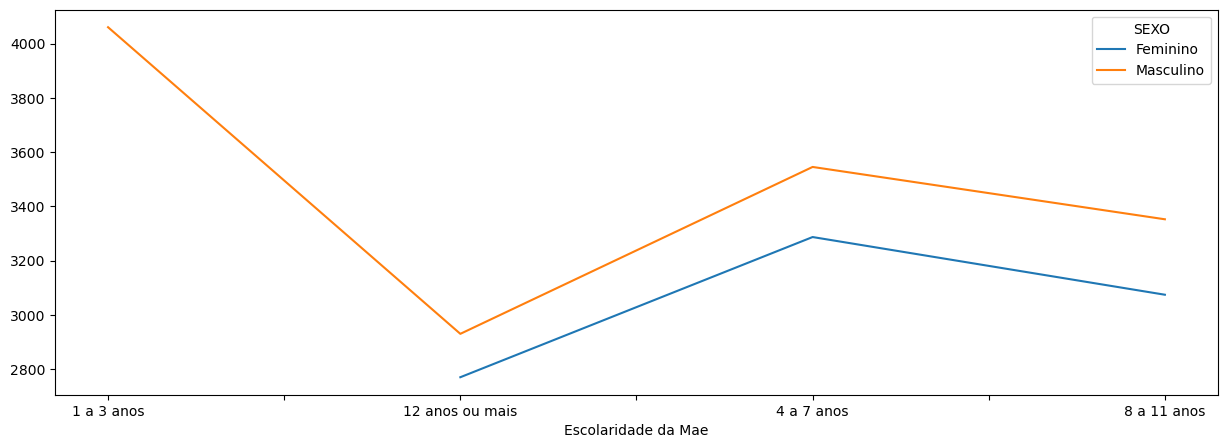

In [37]:
sinasc_2.groupby(['ESCMAE','SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);

plt.xlabel('Escolaridade da Mae')

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [51]:
# O municipio que nasceu menos bebe foi castanheiras
sinasc_1['munResNome'].value_counts(ascending = True)

Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Primavera de Rondônia          43
Parecis                        44
Rio Crespo                     50
São Felipe D'Oeste             54
Teixeirópolis                  64
Cacaulândia                    75
Cabixi                         80
Vale do Paraíso                81
Ministro Andreazza             84
Vale do Anari                  93
Theobroma                      97
Novo Horizonte do Oeste        98
Santa Luzia D'Oeste            99
Nova União                    104
Itapuã do Oeste               109
Governador Jorge Teixeira     112
Corumbiara                    127
Alto Alegre dos Parecis       154
Chupinguaia                   162
Mirante da Serra              164
Campo Novo de Rondônia        166
Seringueiras                  168
Urupá                         170
Monte Negro                   199
Cujubim                       205
Alvorada D'Oeste              205
Colorado do Oe

In [53]:
#criei uma variavel que filtra apenas dados do municipio de castanheiras

castanheiras = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']
ccastanheiras.head()

,munResNome,IDADEMAE,IDADEPAI
2067,Castanheiras,18,17.0
2300,Castanheiras,31,36.0
4512,Castanheiras,22,NaN
5881,Castanheiras,26,24.0
5952,Castanheiras,32,29.0


In [65]:
castanheiras.groupby('munResNome').agg({'IDADEMAE':[np.mean , max, min], 'IDADEPAI':[np.mean , max, min]})

IDADEMAE           IDADEPAI            
                  mean max min       mean   max   min
munResNome                                           
Castanheiras  27.28125  39  17  30.392857  43.0  17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [77]:
marco = sinasc_raw[(sinasc_raw['DTNASC'] >= '2019-03-01') & (sinasc_raw['DTNASC']<= '2019-03-31')]
marco.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
5,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,2.0,1.0,...,5,6,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
9,1,2679477.0,110001,1,30,2.0,1 a 3 anos,999992.0,1.0,1.0,...,5,10,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
10,1,2679477.0,110001,1,31,5.0,8 a 11 anos,512105.0,1.0,0.0,...,5,11,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [81]:
marco['munResNome'].value_counts() # Porto Velho é o municipio que mais nasceu bebe no mes de Marco

Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Machadinho D'Oeste            44
Espigão D'Oeste               44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alto Paraíso                  22
Alvorada D'Oeste              22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Seringueiras                  19
Colorado do Oeste             19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14
Vale do Pa

In [91]:
porto_velho = marco[marco['munResNome'] == 'Porto Velho']
porto_velho.agg({'QTDFILVIVO':[np.mean , max, min],'IDADEMAE':[np.mean , max, min], 'IDADEPAI':[np.mean , max, min]})

,QTDFILVIVO,IDADEMAE,IDADEPAI
mean,1.295056,26.596774,34.629032
max,9.000000,44.000000,62.000000
min,0.000000,14.000000,19.000000


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [92]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [93]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [94]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [95]:

#'PARTO': Tipo de parto (normal, cesárea)
sinasc_raw.PARTO.value_counts()

Cesáreo    18036
Vaginal     8943
Name: PARTO, dtype: int64

In [96]:

#'GESTACAO': Tempo de gestação em semanas.
sinasc_raw.GESTACAO.value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

Text(0, 0.5, 'idade media da mae')

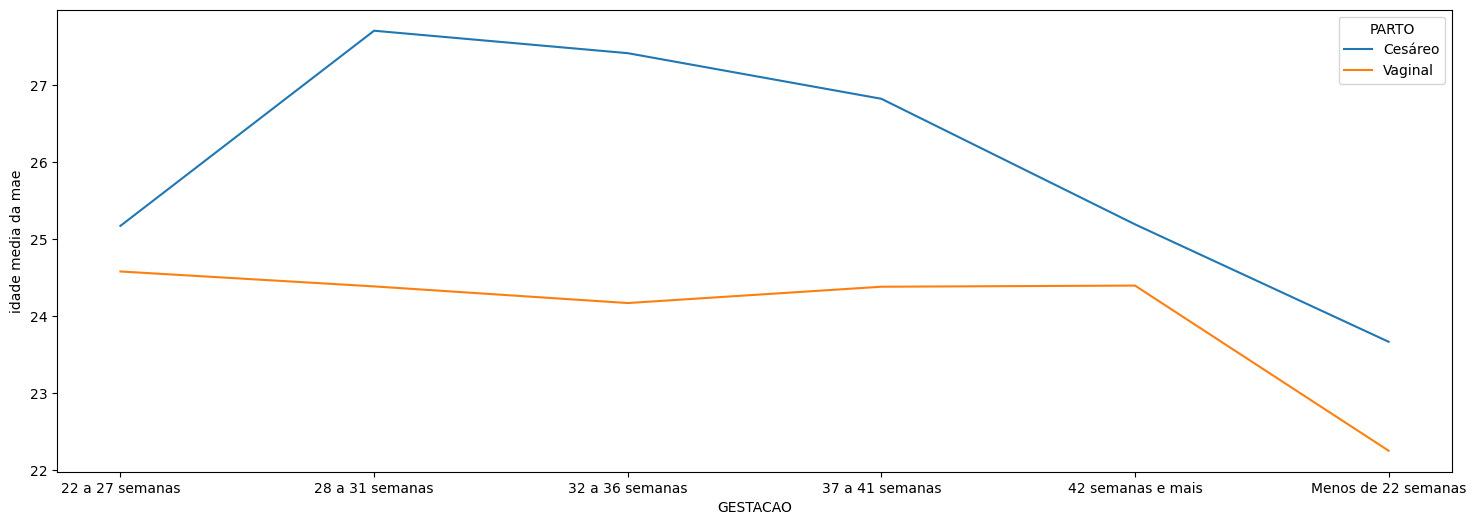

In [114]:
# media de idade da mae é maior em parto cesaria que normal
gestacao_parto = sinasc_raw.groupby(['GESTACAO', 'PARTO'])['IDADEMAE'].mean().unstack()
gestacao_parto.plot(figsize = [18,6])
plt.ylabel('idade media da mae')

In [116]:
sinasc_raw.groupby(['GESTACAO', 'PARTO'])['QTDFILVIVO'].count().unstack()

PARTO,Cesáreo,Vaginal
GESTACAO,,
22 a 27 semanas,22,58
28 a 31 semanas,83,64
32 a 36 semanas,1375,703
37 a 41 semanas,14470,6859
42 semanas e mais,390,276
Menos de 22 semanas,3,4


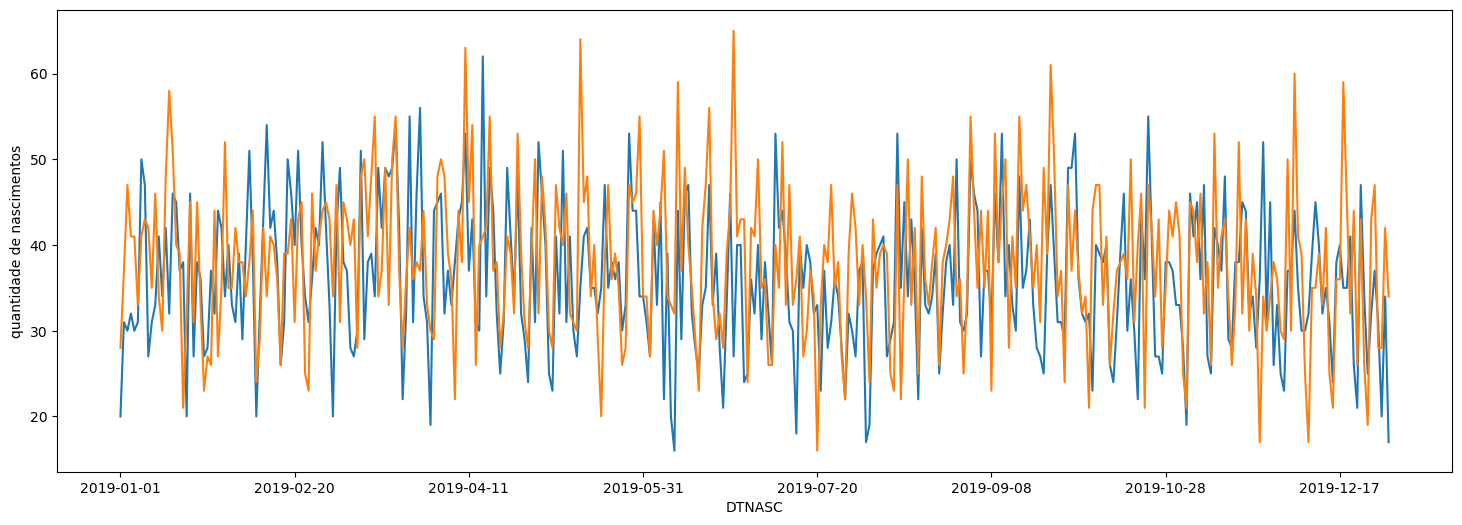

In [120]:
fem = sinasc_raw[sinasc_raw['SEXO'] == 'Feminino'].groupby('DTNASC')['IDADEMAE'].count()
masc = sinasc_raw[sinasc_raw['SEXO'] == 'Masculino'].groupby('DTNASC')['IDADEMAE'].count()
fem.plot(figsize=[18,6])
masc.plot()
plt.ylabel('quantidade de nascimentos');